# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [4]:
employee=pd.read_csv('/Users/rutepalminha/Desktop/ironhack/week 4/labs4/lab-pivot-table-and-correlation/your_code/data/Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [5]:
employee.groupby(['Department']).agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [14]:
employee.pivot_table(index=['Department'], values=['Salary'])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [15]:
employee.pivot_table(index=['Department','Title'], values=['Salary'])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [27]:
employee.pivot_table(index=['Title','Years'], values=['Salary'])

Salary
Title     Years        
VP        8          70
analyst   1          35
          2          30
          4          35
associate 2          55
          3          55
          7          60

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [36]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [35]:
employee.pivot_table(index=['Department','Title'], values=['Salary'], aggfunc={'Title':'count', 'Salary':'mean'})

Salary  Title
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [40]:
table1=employee.pivot_table(index=['Department','Title'], values=['Salary'], aggfunc={'Salary':['median','max','min','std']})

#### Based on your comments, fill the missing values with an appropriate value.

In [41]:
table1.fillna(0)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [45]:
employee.pivot_table(index=['Department'], values=['Salary'], aggfunc={'Department':'count', 'Salary':'sum'})

,Department,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [48]:
employee.pivot_table(index=['Department','Title'], aggfunc={'Salary':'mean', 'Years':'sum'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [49]:
fitbit=pd.read_csv('/Users/rutepalminha/Desktop/ironhack/week 4/labs4/lab-pivot-table-and-correlation/your_code/data/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [51]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [ ]:
# your answer here


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

<function matplotlib.pyplot.show(close=None, block=None)>

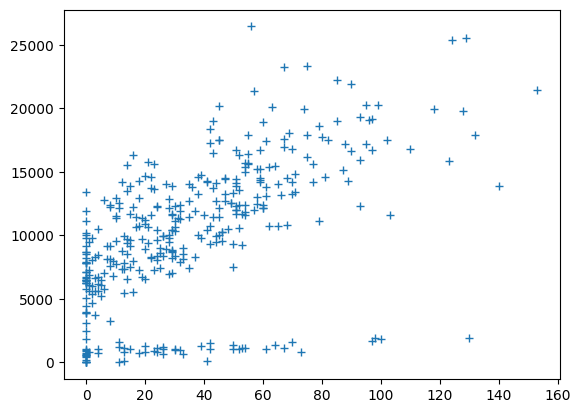

In [58]:
x=fitbit['Minutes Very Active']
y=fitbit['Steps']
plt.plot(x,y, '+')
plt.show

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

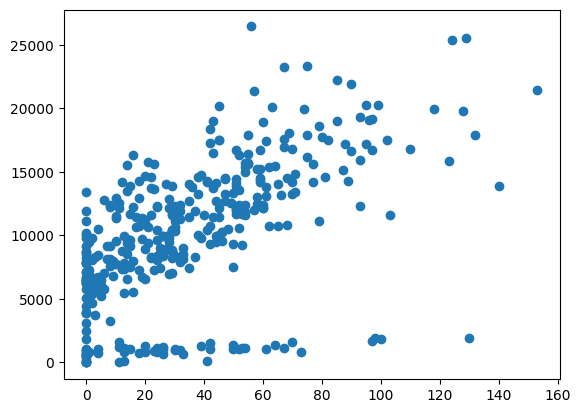

In [59]:
plt.scatter(x,y)

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

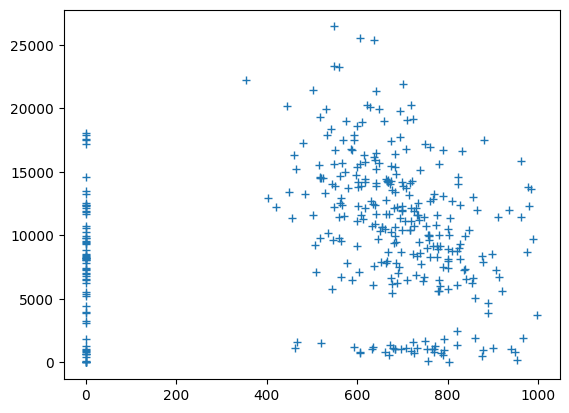

In [62]:
x=fitbit['Minutes Sedentary']
y=fitbit['Steps']
plt.plot(x,y,'+')

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

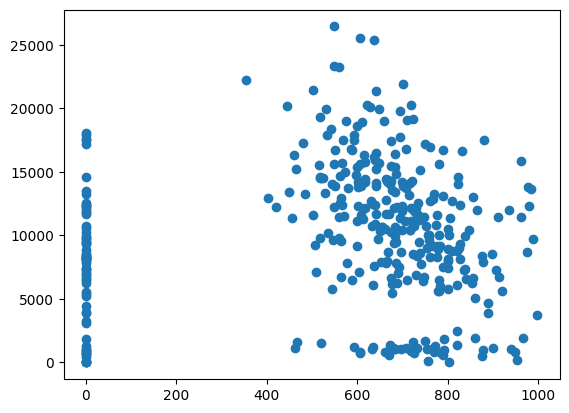

In [63]:
plt.scatter(x,y)

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

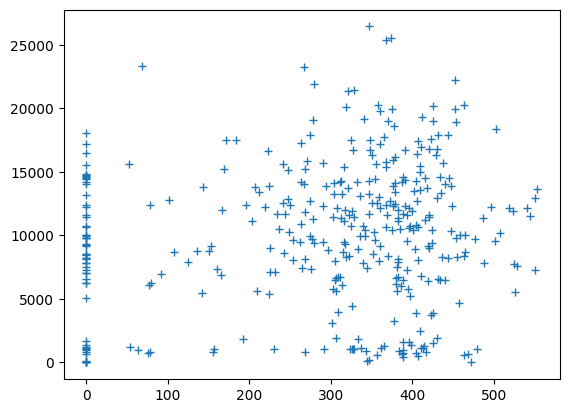

In [64]:
x=fitbit['MinutesOfSleep']
y=fitbit['Steps']
plt.plot(x,y,'+')

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

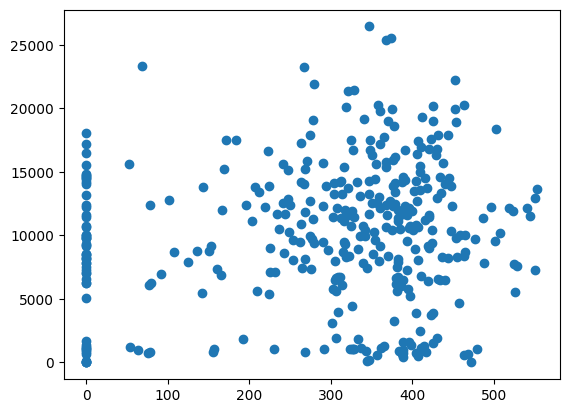

In [65]:
plt.scatter(x,y)

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [71]:
corr_list=fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
cor_fit=corr_list.corr()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# your answer here


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [79]:
time_grades=pd.read_csv('/Users/rutepalminha/Desktop/ironhack/week 4/labs4/lab-pivot-table-and-correlation/your_code/data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

<AxesSubplot: >

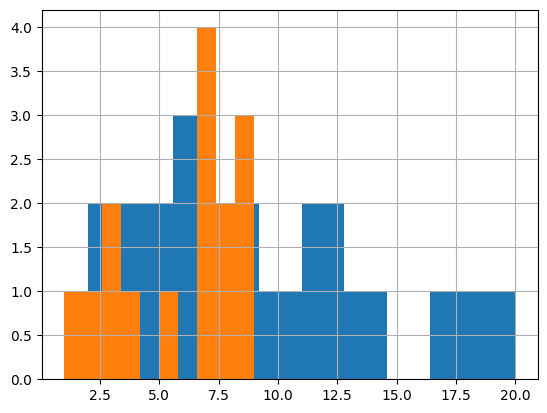

In [82]:

time_grades['Study time'].hist()
time_grades['Grade'].hist()


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [94]:

x=time_grades['Study time']
y=time_grades['Grade']
np.corrcoef(x,y)

array([[1.        , 0.79804561],
       [0.79804561, 1.        ]])

In [95]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485)

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

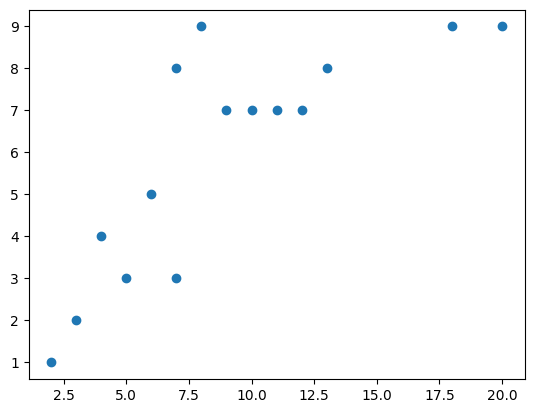

In [93]:
# your answer here
plt.scatter(x,y)

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [90]:
# your answer here
